In [81]:
import pandas as pd, numpy as np, json, os
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
m=json.loads(open('ignore/member_timelines.json','r').read())

In [83]:
set([i['Csoportok'] for i in m if i['Típus']=='Párt'])

{'⚛️ PP-DD - Partidul Poporului Dan Diaconescu',
 '⚪️ FDSN - Frontul Democrat al Salvarii Nationale',
 '⚪️ FSN - Frontul Salvării Naţionale',
 '✳️ PNTCD - Partidul Naţional Ţărănesc Creştin Democrat',
 '🌷 RMDSZ - Romániai Magyar Demokrata Szövetség',
 '🌹 PDSR - Partidul Democraţiei Sociale din România',
 '🌹 PSD - Partidul Social Democrat',
 '🌹 PSDR - Partidul Social Democrat Român',
 '🌹 PSM - Partidul Socialist al Muncii',
 '🍀 FER - Federaţia Ecologistă Română',
 '🍀 MER - Mişcarea Ecologistă din România',
 '🍀 PDAR - Partidul Democrat Agrar din România',
 '🍀 PER - Partidul Ecologist Român',
 '🍏 PMP - Partidul Mişcarea Populară',
 '👤 Independent - Independent',
 '👤 Minorități - Minorități',
 '📐 PAC - Partidul Alianţei Civice',
 "📐 PL'93 - Partidul Liberal",
 '📐 PNL - Partidul Naţional Liberal',
 '📐 PNL-AT - Partidul Naţional Liberal',
 '📐 PNL-CD - Partidul Naţional Liberal',
 '🔘 AUR - Alianţa pentru Unitatea Românilor',
 '🔘 FC - Forţa Civică',
 '🔘 GDC - Gruparea Democratică de Centru',
 

In [84]:
# m=m[:1000]

In [85]:
data={'Ország':{},'Bizottság':{},'Párt':{},'Megye':{}}
attention={}
for k,i in enumerate(m):
    if k%1000==0: print(k/len(m)*100,'%')
    name=i['Simple']
    if i['Típus'] in list(data.keys()):
        if i['Csoportok'] not in data[i['Típus']]:data[i['Típus']][i['Csoportok']]={}
        for t in pd.date_range(i['start'],i['end']):
            st=str(t)[:10]
            if st not in data[i['Típus']][i['Csoportok']]:data[i['Típus']][i['Csoportok']][st]=set()
            data[i['Típus']][i['Csoportok']][st].add(name)            
            if name not in attention:attention[name]={}
            if st not in attention[name]:attention[name][st]=0
            attention[name][st]+=1

0.0 %
3.302728053372085 %
6.60545610674417 %
9.908184160116255 %
13.21091221348834 %
16.513640266860428 %
19.81636832023251 %
23.1190963736046 %
26.42182442697668 %
29.72455248034877 %
33.027280533720855 %
36.33000858709294 %
39.63273664046502 %
42.93546469383711 %
46.2381927472092 %
49.540920800581276 %
52.84364885395336 %
56.14637690732545 %
59.44910496069754 %
62.751833014069625 %
66.05456106744171 %
69.35728912081379 %
72.66001717418588 %
75.96274522755796 %
79.26547328093004 %
82.56820133430213 %
85.87092938767422 %
89.1736574410463 %
92.4763854944184 %
95.77911354779047 %
99.08184160116255 %


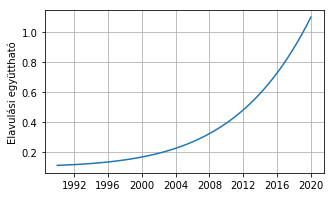

In [86]:
def anneal(t,p=7):
    #pd.to_datetime('2020-01-01')-pd.to_datetime('1989-01-01')=11322
    return (2-(pd.to_datetime('2020-01-01')-pd.to_datetime(t)).days/11322)**p
    
tanneal={}
anneal2020=anneal(pd.to_datetime('2020'))
for t in pd.date_range('1990','2020'):
    tanneal[t]=anneal(t)/anneal2020+0.1
    tanneal[str(t)[:10]]=tanneal[t]
plt.subplots(1,1,figsize=(5,3))
plt.grid()
plt.plot(tanneal.keys(),tanneal.values())
plt.ylabel('Elavulási együttható')
plt.show()

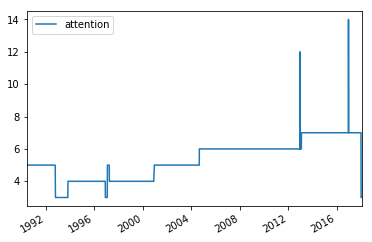

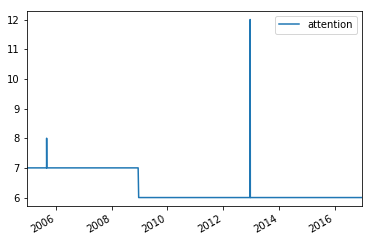

In [134]:
att=pd.DataFrame(attention['Verestoy Attila | 1954-03-01'],index=['attention']).T
att.index=pd.to_datetime(att.index)
att.plot()
att=pd.DataFrame(attention['Chelaru Ioan | 1953-02-10'],index=['attention']).T
att.index=pd.to_datetime(att.index)
att.plot()

In [87]:
edges={}
points={'Ország':3,'Bizottság':4,'Párt':2,'Megye':1}
for tipus in data:
    for csoport in data[tipus]:
        print(csoport)
        for t in data[tipus][csoport]:
            names=list(data[tipus][csoport][t])
            for r in range(len(names)):
                name=names[r]
                for p in range(r+1,len(names)):
                    name2=names[p]
                    nset=tuple(np.sort([name,name2]))
                    v=points[tipus]
                    if nset not in edges:edges[nset]={'anneal':0,'values':0}
                    edges[nset]['values']+=v
                    edges[nset]['anneal']+=v*tanneal[t]

🇨🇾 Ciprus
🇩🇰 Dánia
🇯🇵 Japán
🇦🇺 Ausztrália
🇪🇸 Spanyolország
🇮🇹 Olaszország
🇱🇧 Libanon
🇲🇳 Mongólia
🇩🇪 Németország
🇬🇳 Guinea
🇬🇷 Görögország
🇭🇺 Magyarország
🇱🇻 Lettország
🇵🇱 Lengyelország
🇵🇹 Portugália
🇫🇷 Franciaország
🇸🇾 Szíria
🇸🇪 Svédország
🇹🇷 Törökország
🇧🇪 Belgium
🇨🇮 Elefántcsontpart
🇬🇧 Egyesült Királyság
🇮🇱 Izrael
🇮🇳 India
🇿🇦 Dél-Afrika
🇪🇬 Egyiptom
🇵🇪 Peru
🇰🇷 Dél-Korea
🇲🇹 Málta
🇦🇹 Ausztria
🇧🇬 Bulgária
🇨🇦 Kanada
🇬🇪 Grúzia
🇲🇽 Mexikó
Más ország
🇲🇦 Marokkó
🇨🇷 Costa Rica
🇰🇼 Kuvait
🇰🇿 Kazahsztán
🇸🇦 Szaúd-Arábia
🇧🇷 Brazília
🇱🇺 Luxemburg
🇨🇳 Kína
🇪🇨 Ecuador
🇻🇪 Venezuela
Jugoszlávia
🇯🇴 Jordánia
🇧🇾 Fehéroroszország
🇨🇺 Kuba
🇫🇮 Finnország
🇲🇰 Macedónia
🇹🇳 Tunézia
🇺🇦 Ukrajna
🇪🇪 Észtország
🇶🇦 Katar
🇧🇭 Bahrein
🇸🇰 Szlovákia
🇧🇴 Bolívia
🇮🇶 Irak
🇺🇸 Egyesült Államok
🇨🇬 Kongó
🇮🇸 Izland
🇸🇬 Szingapúr
🇨🇴 Kolumbia
🇸🇩 Szudán
🇱🇹 Litvánia
🇷🇸 Szerbia
🇩🇿 Algéria
🇹🇲 Türkmenisztán
🇺🇾 Uruguay
🇦🇲 Örményország
🇦🇱 Albánia
🇵🇦 Panama
🇮🇷 Irán
🇨🇿 Czechia
🇳🇴 Norvégia
🇧🇦 Bosznia-Hercegovina
🇳🇱 Hollandia
🇹🇭 Thaiföld
🇵🇭 Fülöp-szi

Save

In [88]:
import pickle

In [89]:
def save_obj(obj, name ):
    with open('ignore/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('ignore/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [90]:
save_obj(edges,'plotter_name_edges')

In [91]:
#edges=load_obj('plotter_name_edges')

Prune

In [92]:
df=pd.DataFrame(edges).T

In [93]:
all_nodes=set(df.reset_index()['level_0']).union(df.reset_index()['level_1'])

In [109]:
min_baratsag=365*2*4  #average bizottsag-barastag * hany ev
df2=df[df['anneal']>min_baratsag]

In [110]:
df2['regi']=df2['anneal']/df2['values']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [111]:
df2=df2['anneal'].reset_index()

In [112]:
df2.columns=['source','target','weight']

In [113]:
nodes={}
for i in all_nodes:
    if i not in nodes:
        nodes[i]={'pr':0,'bc':0,'cf':0}

In [114]:
G=nx.Graph(df2)

In [115]:
r = nx.pagerank(G,weight='weight')
mr=np.median(list(r.values()))
for i in r:
    nodes[i]['pr']=r[i]/mr

In [116]:
Gc = max(nx.connected_component_subgraphs(G), key=len)
r = nx.current_flow_closeness_centrality(Gc,weight='weight')
mr=np.median(list(r.values()))
for i in r:
    nodes[i]['cf']=r[i]/mr

In [117]:
links={}
for i in G.edges(data=True):
    name=i[0]
    name2=i[1]
    z=i[2]['weight']
    if name not in links:links[name]={}
    if name2 not in links:links[name2]={}
    links[name][name2]=z
    links[name2][name]=z

In [118]:
#save 
network={'nodes':nodes,'links':links}
print(len(nodes),'nodes and',len(G.edges()),'edges')

2818 nodes and 37938 edges


In [119]:
open('ignore/plotter_name.json','w').write(json.dumps(network))

4285741

In [120]:
import zipfile

with zipfile.ZipFile("json/plotter_name.zip", "w", compression=zipfile.ZIP_DEFLATED) as zf:
    zf.write("ignore/plotter_name.json",'plotter_name.json')